# Chapter 7 (solution)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 5

The decomposition of nitrogen dioxide is a second order reaction with rate constants as follows: 522 M$^{-1}$s$^{-1}$ at 592 K,
755 M$^{-1}$s$^{-1}$ at 603 K, 1700 M$^{-1}$s$^{-1}$ at 627 K, and 4020 M$^{-1}$s$^{-1}$ at 652 K. Calculate $E_a$. and $\log A$. What do these values tell you about the reaction?


We need arrhenius equation, which is $$k = A\exp\left( -\frac{E_a}{RT}\right)$$

, its linearized form is $$\ln k = \ln A -\frac{E_a}{R}\frac{1}{T} $$

therefore we need to plot natural log of rate constant over reciprocal temperature.

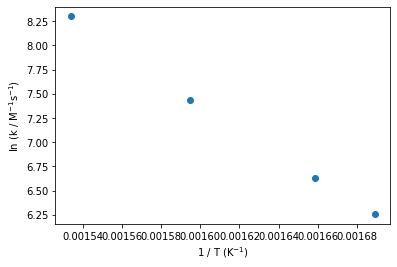

In [26]:
rates = np.asarray([522, 755, 1700, 4020])  # rate constants in M^-1 s^-1
temperatures = np.asarray([592, 603, 627, 652])  # temperatures in Kelvins

ln_k = np.log(rates)  # natural log of rate constants
rec_T = 1 / temperatures  # reciprocal temperatures

plt.scatter(rec_T, ln_k)
plt.xlabel("1 / T (K$^{-1}$)")
plt.ylabel("ln (k / M$^{-1}$s$^{-1}$)")
plt.show()

Now we need to fit the line to those points by linear least squares which solves the following overdetermined matrix equation:

$$\bf{Ax} = \bf{b}$$  where  $\bf{b} = \begin{pmatrix} y_1 \\ \vdots  \\ y_n  \end{pmatrix}$ are y points, $\bf{A} = \begin{pmatrix} x_1 & 1\\ \vdots & \vdots \\ x_n & 1 \end{pmatrix}$ and $\bf{x} = \begin{pmatrix} slope\\ intercept \end{pmatrix}$

Least squares solution for $\bf x$ is $$\bf\hat{x} = \bf{A^+ b}$$ where $\bf{A^+}$ is Moore-Penrose generalized inverse of $\bf A$.

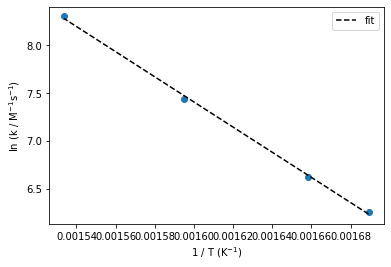

slope: -13132.96768845863, intercept: 28.418391532105552


In [27]:
# define a function for linear regression
def linregress(xvals, yvals):
    from scipy.linalg import lstsq  # import least squares solver
    A = np.ones((xvals.shape[0], 2), dtype=np.float64)  # make the A matrix
    A[:, 0] = xvals  # fill x points
    slope, intercept = lstsq(A, yvals)[0]  # fit x
    y_fit = slope * xvals + intercept
    return slope, intercept, y_fit

slope, intercept, ln_k_fit = linregress(rec_T, ln_k)

plt.scatter(rec_T, ln_k)
plt.plot(rec_T, ln_k_fit, color='k', ls='--', label='fit')
plt.xlabel("1 / T (K$^{-1}$)")
plt.ylabel("ln (k / M$^{-1}$s$^{-1}$)")
plt.legend()
plt.show()
print(f'slope: {slope}, intercept: {intercept}')

In [28]:
log10_A = intercept * np.log10(np.e)  # convert ln A to log10 A
Ea = - slope * 8.314 / 4.184  # calculate activation energy from the slope, recalculate to cal/mol

print(f'log A = {log10_A:.3g}, Ea = {Ea * 1e-3:.3g} kcal/mol')

log A = 12.3, Ea = 26.1 kcal/mol


What does $\log A$ and $E_a$ tells us about the reaction ???

$\log A$ tells us about entropy: $$\Delta S^{\ddagger} = 4.576\left( \log A - 10.753 -\log T \right)$$

For our lowest temperature of 592 K, $\log T \approx 6.38$, so  $\log A < 10.753 + 6.38$ and therefore $\Delta S^{\ddagger}$ will be negative. This is common for second order reactions as both reactants need to preorganize in the transition state. The actiavtion energy of $E_a = 26.1$ kcal/mol is quite high and therefore processed at elevated temperatures.

## Exercise 11

The decomposition of dinitrogen pentoxide shows the following decrease in concentration as a function of time. What are
the reaction order and the rate constant?

Lets plot the data provided

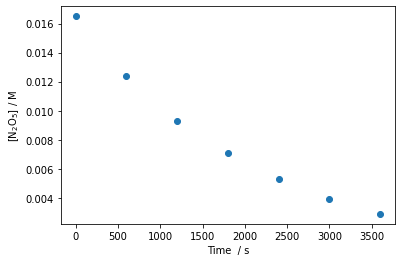

In [29]:
times = np.linspace(0, 3600, 7)  # times
c = np.asarray([0.0165, 0.0124, 0.0093, 0.0071, 0.0053, 0.0039, 0.0029])  # time-dependent concentrations

plt.scatter(times, c)
plt.xlabel("Time / s")
plt.ylabel("[N$_2$O$_5$] / M")
plt.show()

It looks like exponential decay which is first order reaction $$c(t) = c(0)e^{-kt}$$, lets transform first order law to linearized form:

$$\ln c(t) = \ln c(0) - kt$$, so we will plot $\ln c(t)$ over time and it should be line.

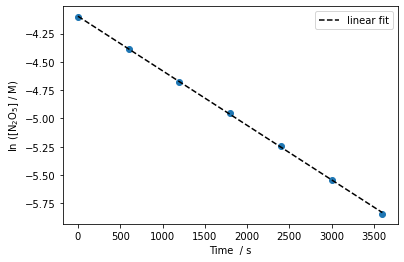

rate constant is 0.000482 s^-1


In [30]:
ln_c = np.log(c)  # calculate the natural log of concentrations

slope, intercept, line_fit = linregress(times, ln_c)  # fit line to those points
plt.scatter(times, ln_c)
plt.plot(times, line_fit, color='k', ls='--', label='linear fit')
plt.xlabel("Time  / s")
plt.ylabel("ln ([N$_2$O$_5$] / M)")
plt.legend()
plt.show()

print(f'rate constant is {-slope:.3g} s^-1')

It perfectly matches, therefore we can conclude that it is reaction of **first order** with a rate constant that we got from the slope: $k =  4.82 \times 10^{-4}\ \mathrm s ^{-1}$